# Five Ws of Formula-1
*Daniil Valyano*

I am a huge F1 fan since 2018, so I considered it to be a perfect object of 'Five Ws' research. Five Ws are just basic questions for information gathering and problem solving you all know. These are: *What?*, *Who?*, *Where?*, *When?*, *Why?* and, sometimes, *How?*. 

I will try to answer all of them from the analytical point of view, and show off my Data Visualization and Data Analysis skills. Hope you can find any curious facts or extaordinary methods I´ve used.
It´s currently still a draft, so I am welcome to your suggestions and comments :)


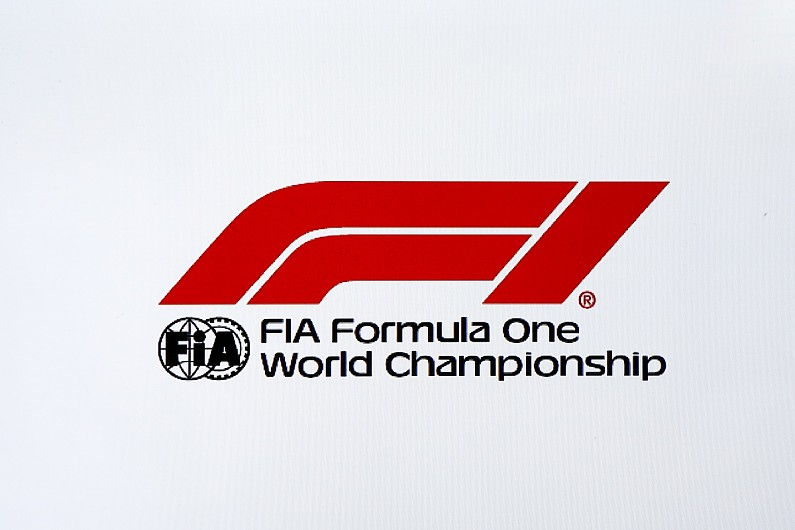

# Stages
1. [Aquire data](http://)
2. [What?](http://)
3. [Who?](http://)
4. [Where?](http://)
5. [When?](http://)
6. [Why? ](http://)
7. [How?](http://)

In [ ]:
# data analysis 
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster

# Where? 

In this step we will answer this question and talk about all circuits, that held F1 races since 1950.
To do so, we read the *'circuits.csv'* file to get all the information related to the F1 circuits. Note that there's an addictional *encoding* argument in *pd.read_csv*, which is used to avoid encoding issues.



## Assumptions

These are the assumptions I previously made:

* United Kingdom or Italy should have big number of F1 circuits (basically because both are crucial elements in world racing development).
* European countries may have a moderated number of F1, due to the fact the first races in formula history were held mostly in Europe ([see link](https://en.wikipedia.org/wiki/1950_Formula_One_season#Championship_summary) ).
* South American and African countries can't have an elevated number of circuits built, because of the recent joining formula-1 championship and climate conditions.
* Circiuts might be located only in few climate zones to avoid the weather conditions have an ifluence on racing process (track maintenance, tyre composition, car technical peculiarities).

## Aquire data

I use Python Pandas package to work with the datasets given. Pandas can also help us to describe the dataset 


In [ ]:
circuits ='../input/formula-1-race-data-19502017/circuits.csv'
circuits = pd.read_csv(circuits,encoding='ISO-8859-1')

 **What are the features?** 
 
By printing out the column names, we can have an idea about the features available in the dataset. The feature names are intuitive and do not require aditional description (see '*cicuits.head()*' output if the features are not clear enough).


In [ ]:
print(circuits.columns.values)

In [ ]:
# preview of the data
circuits.head()

**Which features contain blank, null or empty values?**

These will require correcting.

* **alt** contains 72 null values of 73 total, and we won't take this feature into consideration during our research. It will be dropped further.

**What are the datatypes for the various features?**

* one feature is integer
* five features are strings (object)
* three features are floats

In [ ]:
circuits.info()

The *'circuits.csv'* file itself does not deserve a deep analysis,since five features are strings. The numerical features in the dataset neither allow us to go deeper, being circuits coordinates (**lat,lng**), unique circuits ID numbers used as keys in other relative files (**circuitId**) and (**alt**) feature, which was dropped earlier by having 98.63% missing values.

Due to this fact we proceed to check our previously made assumptions.

In [ ]:
country = circuits[['country', 'name']].groupby(['country'], as_index = False).count().sort_values(by = 'name', ascending = False)
top_7_countries = country[['country','name']][:7]

### Assumption 1: There are more circuits in UK and Italy rather in other countries

We've built a pivot table of countries by the number of circuits built in them, and plotted the top-7 for a better understanding of this question.



In [ ]:
colors = ['royalblue']
plt.bar(top_7_countries['country'],top_7_countries['name'], align= 'center', alpha = 0.7, color = colors)
plt.xlabel('Country',style ='italic')
plt.ylabel('Number of circuits',style = 'italic')
plt.yticks([3,5,7,9,11])
plt.title('Top 7 countries by number of circuits', fontname = 'Ubuntu')
plt.show()

Surprisingly there are only 3 and 4 circuits in Italy and UK respectively. Spain has 6 racetracks taken part in F1, France reaches 7, but USA stands at the first place with **11** circuits! Unbelievable results from a single barplot.

### Assumption 2: Climate zones

Let's head up to the climate zones analysis. At this step we need to know some additional information about climate classification. Köppen climate classification used during this analysis is better described [here](https://en.wikipedia.org/wiki/Köppen_climate_classification).

Long story short, Köppen highlights five primary types, but we'll use the extension of these and define eleven subtypes:
1. Tropical rainforest - 'troprain'
2. Tropical savanna - 'tropsav'
3. Desert - 'des'
4. Steppe - 'steppe'
5. Humid subtropical - 'humsub'
6. Marine west coast - 'mwc'
7. Mediterranean - 'med'
8. Humid continental - 'hcont'
9. Subarctic - 'sarc'
10. Tundra - 'tundra'
11. Icecap - 'ice'

Initially we don't expect the circuits to be built in marginal climate zones, either tropical (1-3) or polar (9-11). Let´s see if real numbers can prove our assuptions. 

In [ ]:
climate_zone = ['mwc', 'troprain', 'des', 'mwc', 'mwc', 'med', 'hcont', 'mwc', 'mwc', 'mwc', 'mwc', 'med', 'mwc', 'mwc', 'troprain', 'humsub', 'humsub', 'tropsav', 'hcont', 'mwc', 'mwc', 'humsub', 'mwc', 'des', 'humsub', 'med', 'med', 'humsub', 'steppe', 'humsub', 'mwc', 'humsub', 'des', 'med', 'humsub', 'humsub', 'humsub', 'mwc', 'mwc', 'mwc', 'mwc', 'humsub', 'steppe', 'humsub', 'med', 'hcont', 'mwc', 'sarc', 'mwc', 'mwc', 'mwc', 'hcont', 'mwc', 'mwc', 'mwc', 'mwc', 'hcont', 'mwc', 'med', 'steppe', 'mwc', 'med', 'humsub', 'med', 'mwc', 'mwc', 'mwc', 'humsub', 'humsub', 'hcont', 'mwc', 'humsub', 'steppe']
circuits['climate_zone'] = climate_zone

**What are the circuits climate zones?**

Since we have the features **lng** and **lat** of each racetrack, we can make all of the climate classifications using any World climate zones map. I used [this one.](https://www.arcgis.com/apps/MapSeries/) Simple as that.

After that we create a list of classifications, named *climate_zone* and add it as another column to our Pandas DataFrame object.

In [ ]:
climate_zone = ['mwc', 'troprain', 'des', 'mwc', 'mwc', 'med', 'hcont', 'mwc', 'mwc', 'mwc', 'mwc', 'med', 'mwc', 'mwc', 'troprain', 'humsub', 'humsub', 'tropsav', 'hcont', 'mwc', 'mwc', 'humsub', 'mwc', 'des', 'humsub', 'med', 'med', 'humsub', 'steppe', 'humsub', 'mwc', 'humsub', 'des', 'med', 'humsub', 'humsub', 'humsub', 'mwc', 'mwc', 'mwc', 'mwc', 'humsub', 'steppe', 'humsub', 'med', 'hcont', 'mwc', 'sarc', 'mwc', 'mwc', 'mwc', 'hcont', 'mwc', 'mwc', 'mwc', 'mwc', 'hcont', 'mwc', 'med', 'steppe', 'mwc', 'med', 'humsub', 'med', 'mwc', 'mwc', 'mwc', 'humsub', 'humsub', 'hcont', 'mwc', 'humsub', 'steppe']
circuits['climate_zone'] = climate_zone
circuits_climate = circuits[['climate_zone','name']].groupby(['climate_zone'], as_index = False).count().sort_values(by='name', ascending = False)
circuits_climate

Seems that we've done a good prediction! The expected values, corresponding to polar zones, appear only once (´*sarc*´ = 1). Tropical zones, which are more frequent to hold F1 circuits, neither can beat more favourable climate zones. Let's draw a bar plot of this data for a better understanding.

In [ ]:
def show_values_on_bars(axs, h_v="v", space=0.7):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() / 2
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
sns.set_style('darkgrid')
label = ['marine west coast', 'humid subtropical', 'mediterranean', 'humid continental','steppe']
ax = sns.barplot(x = circuits_climate['name'][:5], y = circuits_climate['climate_zone'][:5])
ax.set_yticklabels(label)
ax.set_ylabel('Number of circuits')
ax.set_xlabel('Climate zone')
ax.set_title('Climate zones with F1 circuits')
show_values_on_bars(ax, "h", space = 0.2)

As we can see, the top-scorer is Marine west coast climate, with 31 observations on it. The West Coast is a Western maritime location. Because of this, the temperatures in this region are mild year round, with warm summers and cool winters. Winter temperatures never average below 0° celsius.Seems like this type of weather is the most favourable to racing and associated activities (racetrack maintenance, tyre composition, car technical peculiarities).

### Assumption 3: Southern American and African countries

To check the last '*Where?*' assumption we'll draw a beautiful world map with the '*folium*' package, using clusters. This graphical representation should be really useful to determine the overall amount of racetracks in each continent.

In [ ]:
circuits_folium = circuits[['name','location','country','lat','lng']]
circuits_folium.head()

In [ ]:
circuits_map = folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(circuits_map)
for i in range(len(circuits_folium)):
    lat = circuits_folium.iloc[i]['lat']
    lng = circuits_folium.iloc[i]['lng']
    radius = 5
    popup_text = circuits_folium.iloc[i]['name']
    folium.CircleMarker(location = [lat, lng], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
circuits_map

We made another good guess. As '*folium*' shows us, there are only 3 and 2 circuits in South America and Africa, compared to 15 and 40 circuits in North America and Europe region respectively. 

This is the end of '*Where?*' section. See you in the next one.